# Convolutional Neural Network for Natural Images Classification

*Hi everyone, this is crazy Allen! I am an enthusiastic learner of machine learning and deep learning. That's my first attempt in Kaggle, which is working on Natural Images Classification using Python. *

## Preparing Data

In [1]:
import os
import cv2
import time
import torch
import random
import numpy as np
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
from matplotlib import style

In [2]:
os.chdir('/kaggle/input/natural-images/data/natural_images')
print(os.listdir())

['airplane', 'dog', 'fruit', 'cat', 'flower', 'person', 'car', 'motorbike']


In [3]:
os.chdir('/kaggle/input')
print(os.listdir())

['natural-images']


In [4]:
REBUILD_DATA = True
class Natural_Images():
    IMG_SIZE = 50
    CAT = '/kaggle/input/natural-images/data/natural_images/cat'
    DOG = '/kaggle/input/natural-images/data/natural_images/dog'
    AIRPLANE = '/kaggle/input/natural-images/data/natural_images/airplane'
    FRUIT = '/kaggle/input/natural-images/data/natural_images/fruit'
    FLOWER = '/kaggle/input/natural-images/data/natural_images/flower'
    PERSON = '/kaggle/input/natural-images/data/natural_images/person'
    CAR = '/kaggle/input/natural-images/data/natural_images/car'
    MOTORBIKE = '/kaggle/input/natural-images/data/natural_images/motorbike'
    TESTING = '/kaggle/input/natural-images/data/natural_images/testing'
    LABELS = {CAT: 0, DOG: 1,AIRPLANE: 2,CAR: 3,MOTORBIKE: 4,FRUIT: 5,FLOWER: 6,PERSON: 7}
    training_data = []
    catcount = 0
    dogcount = 0
    airplanecount = 0
    fruitcount = 0
    flowercount = 0
    personcount = 0
    carcount = 0
    motorbikecount = 0

    def make_training_data(self):
        for label in self.LABELS:  # this return all of the keys (the directory of cats,dogs and so on)
            for f in os.listdir(label):  # f is the file name,all of the images
                if 'jpg' in f:
                        path = os.path.join(label, f)
                        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                        img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))
                        self.training_data.append([np.array(img), np.eye(8)[self.LABELS[label]]])
        
                        if label == self.CAT:
                            self.catcount = self.catcount + 1
                        elif label == self.DOG:
                            self.dogcount += 1
                        elif label == self.AIRPLANE:
                            self.airplanecount += 1
                        elif label == self.FRUIT:
                            self.fruitcount += 1
                        elif label == self.FLOWER:
                            self.flowercount += 1
                        elif label == self.PERSON:
                            self.personcount += 1
                        elif label == self.CAR:
                            self.carcount += 1
                        elif label == self.MOTORBIKE:
                            self.motorbikecount += 1

        np.random.shuffle(self.training_data)
        np.save("/kaggle/input/tra_data.npy",self.training_data)
        print('CATS:',natural_images.catcount)
        print('DOGS:',natural_images.dogcount)
        print('AIRPLANE:',natural_images.airplanecount)
        print('FRUIT:',natural_images.fruitcount)
        print('FLOWER:',natural_images.flowercount)
        print('PERSON:',natural_images.personcount)
        print('CAR:',natural_images.carcount)
        print('MOTORBIKE:',natural_images.motorbikecount)

In [5]:
if REBUILD_DATA:
    natural_images = Natural_Images()
    natural_images.make_training_data()

CATS: 885
DOGS: 702
AIRPLANE: 727
FRUIT: 1000
FLOWER: 843
PERSON: 986
CAR: 968
MOTORBIKE: 788


In [6]:
training_data = np.load("/kaggle/input/tra_data.npy", allow_pickle=True)
print(len(training_data))

6899


/opt/conda/lib/python3.6/site-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


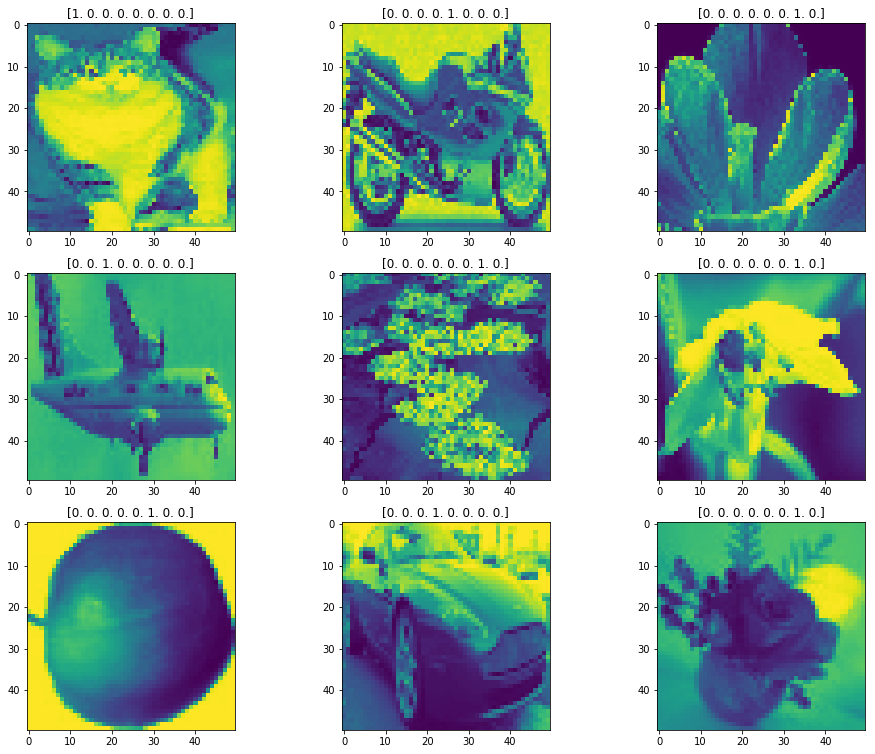

In [7]:
# LABELS = {CAT: 0, DOG: 1,AIRPLANE: 2,CAR: 3,MOTORBIKE: 4,FRUIT: 5,FLOWER: 6,PERSON: 7}
plt.rcParams['figure.figsize'] = [16, 13]
plt.figure(33)
for i in range(331,340,1):
    plt.subplot(i)
    plt.imshow(training_data[i][0])
    plt.title(training_data[i][1])

In [8]:
# Now we can split our training data into X and y, as well as convert it to a tensor
# We also need to shape this data (view it, according to Pytorch) in the way Pytorch expects us (-1, IMG_SIZE, IMG_SIZE)
X = torch.Tensor([i[0] for i in training_data]).view(-1,50,50)
X = X/255.0
y = torch.Tensor([i[1] for i in training_data])

## Training Model

In [9]:
class Net(nn.Module):
    def __init__(self):
        super().__init__() 
        self.conv1 = nn.Conv2d(1, 32, 5) 
        self.conv2 = nn.Conv2d(32, 64, 5) 
        self.conv3 = nn.Conv2d(64, 128, 5)

        x = torch.randn(50,50).view(-1,1,50,50)
        
        self._to_linear = None
        self.convs(x)
        
        self.fc1 = nn.Linear(self._to_linear, 512) 
        self.fc2 = nn.Linear(512, 8) 
        
    def convs(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2),ceil_mode=True)
        x = F.max_pool2d(F.relu(self.conv2(x)), (2, 2),ceil_mode=True)
        x = F.max_pool2d(F.relu(self.conv3(x)), (2, 2),ceil_mode=True)
        
        if self._to_linear is None:
            self._to_linear = x[0].shape[0]*x[0].shape[1]*x[0].shape[2]

        return x
    
    def forward(self, x):
        x = self.convs(x)
        x = x.view(-1, self._to_linear)  
        x = F.relu(self.fc1(x))
        x = self.fc2(x) 
        return F.softmax(x, dim=1)

    
net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=1152, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=8, bias=True)
)


In [10]:
optimizer = optim.Adam(net.parameters(), lr=0.001)
loss_function = nn.MSELoss()
VAL_PCT = 0.2  # reserve 20% of our data for validation
val_size = int(len(X)*VAL_PCT)
print(val_size)

1379


In [11]:
train_X = X[:-val_size]
train_y = y[:-val_size]
test_X = X[-val_size:]
test_y = y[-val_size:]

print(len(train_X), len(test_X))

5520 1379


In [12]:
BATCH_SIZE = 200
EPOCHS = 8

In [13]:
for epoch in range(EPOCHS):
    for i in range(0, len(train_X), BATCH_SIZE): 
        batch_X = train_X[i:i+BATCH_SIZE].view(-1, 1, 50, 50)
        batch_y = train_y[i:i+BATCH_SIZE]

        net.zero_grad()

        outputs = net(batch_X)
        loss = loss_function(outputs, batch_y)
        
        matches  = [torch.argmax(i)==torch.argmax(j) for i, j in zip(outputs, batch_y)]
        in_sample_acc = matches.count(True)/len(matches)

        loss.backward() 
        optimizer.step()

    print(f"Epoch: {epoch}. Loss: {loss}")
    print("In-sample acc:",round(in_sample_acc, 4))

Epoch: 0. Loss: 0.0627661794424057
In-sample acc: 0.5667
Epoch: 1. Loss: 0.04162494093179703
In-sample acc: 0.7583
Epoch: 2. Loss: 0.031240560114383698
In-sample acc: 0.8417
Epoch: 3. Loss: 0.027228737249970436
In-sample acc: 0.8667
Epoch: 4. Loss: 0.025677021592855453
In-sample acc: 0.8667
Epoch: 5. Loss: 0.02569688856601715
In-sample acc: 0.8833
Epoch: 6. Loss: 0.021714255213737488
In-sample acc: 0.8833
Epoch: 7. Loss: 0.019671708345413208
In-sample acc: 0.9


In [14]:
correct = 0
total = 0
with torch.no_grad():
    for i in range(len(test_X)):
        real_class = torch.argmax(test_y[i])
        net_out = net(test_X[i].view(-1, 1, 50, 50))[0]  # returns a list
        predicted_class = torch.argmax(net_out)

        if predicted_class == real_class:
            correct += 1
        total += 1
print("Accuracy: ", round(correct/total, 4))

Accuracy:  0.7955


## Evaluation of Model

In [15]:
def fwd_pass(X, y, train=False):

    if train:
        net.zero_grad()
    outputs = net(X)
    matches  = [torch.argmax(i) == torch.argmax(j) for i, j in zip(outputs, y)]
    acc = matches.count(True)/len(matches)
    loss = loss_function(outputs, y)

    if train:
        loss.backward()
        optimizer.step()

    return acc, loss

In [16]:
def test(size = 100):
    random_start = random.randint(0,len(test_X - size))
    X, y = test_X[random_start:random_start + size], test_y[random_start:random_start + size]
    with torch.no_grad():
        val_acc, val_loss = fwd_pass(X.view(-1,1,50,50),y)
    return val_acc, val_loss
val_acc, val_loss = test(size = 100)
print(val_acc, val_loss)

0.85 tensor(0.0275)


In [17]:
MODEL_NAME = f"model-{int(time.time())}"  
net = Net()
optimizer = optim.Adam(net.parameters(), lr=0.001)
loss_function = nn.MSELoss()
print(MODEL_NAME)

model-1573625515


In [18]:
def train(net):
    BATCH_SIZE = 200
    EPOCHS = 8
    with open("modeldata.log", "a") as f:
        for epoch in range(EPOCHS):
            # iterate over our batches 
            for i in range(0, len(train_X), BATCH_SIZE):
                # slice our data into batches
                batch_X = train_X[i:i+BATCH_SIZE].view(-1,1,50,50)
                batch_y = train_y[i:i+BATCH_SIZE]
                acc, loss = fwd_pass(batch_X, batch_y, train=True)
                # calculate in sample acc and loss, each 50 steps
                if i%50 == 0:
                    val_acc, val_loss = test(size = 100)
                    f.write(f"{MODEL_NAME},{int(time.time())},in_sample,{round(float(acc),2)},{round(float(loss),4)}, out_of_sample,{round(float(val_acc),2)},{round(float(val_loss),4)}\n")

In [19]:
train(net)

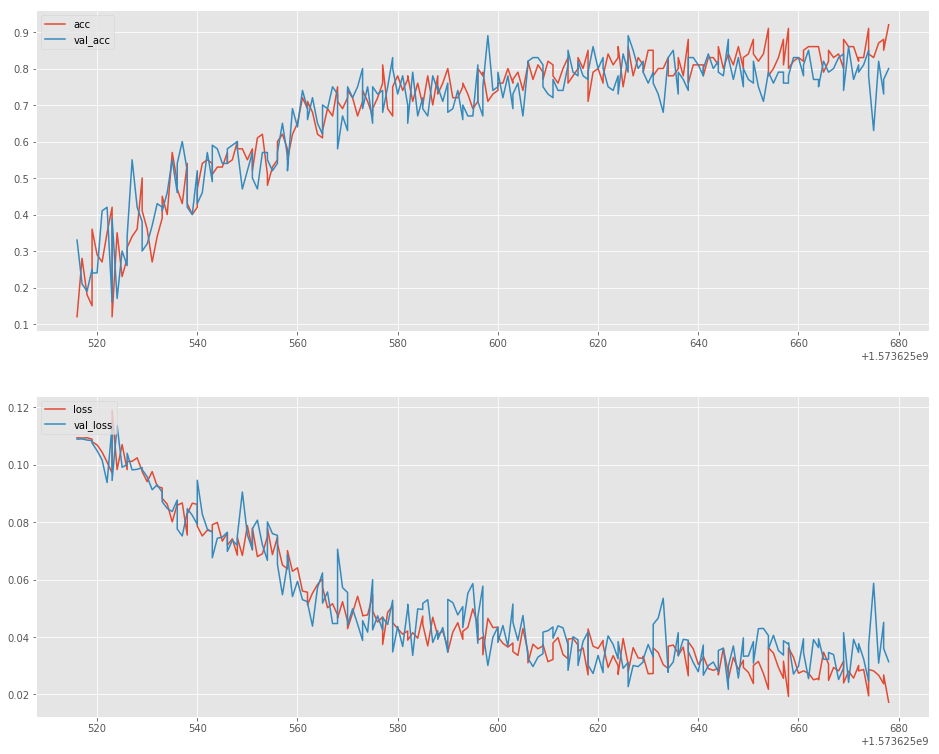

In [20]:
style.use("ggplot")

model_name = "MODEL_NAME1" 
# grab whichever model name you want here.


def create_acc_loss_graph(model_name):
    # read the file and split by new line
    times = []
    accuracies = []
    losses = []
    val_accs = []
    val_losses = []
    # iterate over our contents 
    with open("modeldata.log", "r") as rf:
        contents = rf.read().split("\n")
        for c in contents:
            try:
                c = c.split(',')
                del c[2]
                del c[4]
                name, timestamp, acc, loss, val_acc, val_loss = c

                times.append(float(timestamp))
                accuracies.append(float(acc))
                losses.append(float(loss))

                val_accs.append(float(val_acc))
                val_losses.append(float(val_loss))
            except IndexError:
                    pass

    fig = plt.figure()
    plt.rcParams['figure.figsize'] = (10.0,5.5)
    plt.rcParams['savefig.dpi'] = 300
    plt.rcParams['figure.dpi'] = 300

    ax1 = plt.subplot2grid((2,1), (0,0))
    ax2 = plt.subplot2grid((2,1), (1,0), sharex=ax1)


    ax1.plot(times, accuracies, label="acc")
    ax1.plot(times, val_accs, label="val_acc")
    ax1.legend(loc=2)
    ax2.plot(times,losses, label="loss")
    ax2.plot(times,val_losses, label="val_loss")
    ax2.legend(loc=2)
    plt.show()
    
create_acc_loss_graph(model_name)